World Population Growth


**The New World**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
PercGrow = pd.read_csv("/content/drive/MyDrive/API_SP.POP.GROW_DS2_en_csv_v2_2164049 (2).csv")
PercGrow.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122,NaN
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.898476,1.965751,2.029893,2.090248,2.147567,...,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817,NaN
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.393363,1.383629,1.256555,0.973962,0.617544,...,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983,NaN


In [4]:
IncomeGroup = pd.read_csv("/content/drive/MyDrive/Metadata_Country_API_SP.POP.GROW_DS2_en_csv_v2_2164049 (2).csv")
IncomeGroup.head(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola


In [5]:
PercGrow.shape

(264, 65)

In [6]:
print(f"{PercGrow[PercGrow.columns[2:4]].value_counts()}\n")
print(PercGrow["1960"].isnull().sum())  
print(PercGrow["2020"].isnull().sum())
PercGrow = PercGrow.drop(PercGrow.columns[2:4],axis=1)
PercGrow = PercGrow.drop(["1960","2020"],axis=1)
PercGrow.head()

Indicator Name                Indicator Code
Population growth (annual %)  SP.POP.GROW       264
dtype: int64

264
264


,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,ALB,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,AND,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,5.500706,5.309820,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [7]:
PercGrow[PercGrow.columns[5:-1]].isnull().sum()


1964    4
1965    4
1966    4
1967    4
1968    4
1969    4
1970    4
1971    4
1972    4
1973    4
1974    4
1975    4
1976    4
1977    4
1978    4
1979    4
1980    4
1981    4
1982    4
1983    4
1984    4
1985    4
1986    4
1987    4
1988    4
1989    4
1990    3
1991    3
1992    3
1993    3
1994    3
1995    3
1996    2
1997    2
1998    2
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    2
2013    2
2014    2
2015    2
2016    2
2017    2
2018    2
dtype: int64

In [8]:
PercGrow = PercGrow.drop(PercGrow[PercGrow["1961"].isnull() == True].index, axis=0)
PercGrow[PercGrow.columns[5:-1]].isnull().sum()
PercGrow = PercGrow.fillna(0)

In [9]:
import re
import requests
from bs4 import BeautifulSoup

url = "https://www.bluemarblecitizen.com/world-population/1961"

try:
    page=requests.get(url)
except:
    print("Problem with the request")

soup=BeautifulSoup(page.content,"html.parser")
results = soup.find_all(class_="popTable")

def cleanhtml(raw_html):
    return re.sub(re.compile('<.*?>'), '/', raw_html).split("//")[1:-1]

dataset = []

for table in results:
    job_section = table.find_all("tr")
    for job in job_section:
        scapped = [item.replace("/","") for item in cleanhtml(str(job))[1:3]] 
        if scapped not in dataset:
            dataset.append(scapped)

d = {str(PercGrow.columns[0]): [item[0] for item in dataset[1:]], 'Population_1961': [int(item[1].replace(",","")) for item in dataset[1:]]}
Population_size_1961 = pd.DataFrame(data=d)
Population_size_1961.head()

,Country Name,Population_1961
0,China,645409760
1,India,454425502
2,United States,182992000
3,Russia,121324346
4,Indonesia,102381963


In [10]:
TestNaN = pd.merge(PercGrow,Population_size_1961,on=str(PercGrow.columns[0]),how='left')
TestNaN[TestNaN.Population_1961.isnull() == True]["Country Name"].unique()

array(['Arab World', 'Bahamas, The', 'Brunei Darussalam',
       'Central Europe and the Baltics', 'Channel Islands',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Caribbean small states',
       'Czech Republic', 'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Egypt, Arab Rep.', 'Euro area',
       'European Union', 'Fragile and conflict affected situations',
       'Micronesia, Fed. Sts.', 'Gambia, The', 'High income',
       'Hong Kong SAR, China', 'Heavily indebted poor countries (HIPC)',
       'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend',
       'IDA only', 'Iran, Islamic Rep.', 'Kyrgyz Republic',
       'St. Kitts and Nevis', 'Korea, Rep.',
       'Latin America & Caribbean (excluding high income)', 'Lao PDR',
       'St. Lucia', 'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income

In [11]:
World = PercGrow[PercGrow["Country Name"] == "World"].copy()
World["Population_1961"] = 3091843507
World

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Population_1961
257,World,WLD,1.35392,1.724198,2.083131,2.052951,2.054892,2.108305,2.046206,2.032273,...,1.17004,1.183831,1.183727,1.179816,1.16812,1.162578,1.14204,1.103609,1.074675,3091843507


In [12]:
PopulationSize = pd.merge(PercGrow,Population_size_1961,on=str(PercGrow.columns[0]),how='inner')

for col in PopulationSize.columns[3:-1]:
    PopulationSize[f"Population_{col}"] = round(PopulationSize[f"Population_{int(col)-1}"] + PopulationSize[f"Population_{int(col)-1}"] * (PopulationSize[col]/100))

PopulationSize.head(5)

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019
0,Aruba,ABW,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,...,103502.0,103885.0,104407.0,105015.0,105639.0,106215.0,106754.0,107256.0,107742.0,108218.0
1,Afghanistan,AFG,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,...,31060834.0,32037115.0,33128808.0,34286524.0,35437036.0,36527463.0,37542312.0,38499020.0,39417130.0,40328382.0
2,Angola,AGO,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,...,19816151.0,20536301.0,21275151.0,22030834.0,22801361.0,23585466.0,24382247.0,25192245.0,26017577.0,26861322.0
3,Albania,ALB,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,...,2917711.0,2909862.0,2905056.0,2899734.0,2893730.0,2885303.0,2880690.0,2878041.0,2870940.0,2858710.0
4,Andorra,AND,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,5.500706,5.309820,...,50676.0,50253.0,49455.0,48453.0,47507.0,46781.0,46351.0,46173.0,46176.0,46257.0


In [13]:
df = pd.merge(IncomeGroup[IncomeGroup.columns[0:3]],PopulationSize,on="Country Code",how='inner')
df.head(5)

,Country Code,Region,IncomeGroup,Country Name,1961,1962,1963,1964,1965,1966,...,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019
0,ABW,Latin America & Caribbean,High income,Aruba,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,...,103502.0,103885.0,104407.0,105015.0,105639.0,106215.0,106754.0,107256.0,107742.0,108218.0
1,AFG,South Asia,Low income,Afghanistan,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,...,31060834.0,32037115.0,33128808.0,34286524.0,35437036.0,36527463.0,37542312.0,38499020.0,39417130.0,40328382.0
2,AGO,Sub-Saharan Africa,Lower middle income,Angola,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,...,19816151.0,20536301.0,21275151.0,22030834.0,22801361.0,23585466.0,24382247.0,25192245.0,26017577.0,26861322.0
3,ALB,Europe & Central Asia,Upper middle income,Albania,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,...,2917711.0,2909862.0,2905056.0,2899734.0,2893730.0,2885303.0,2880690.0,2878041.0,2870940.0,2858710.0
4,AND,Europe & Central Asia,High income,Andorra,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,...,50676.0,50253.0,49455.0,48453.0,47507.0,46781.0,46351.0,46173.0,46176.0,46257.0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
colunms = World.columns[3:-1].copy()

for col in colunms:
    World[f"Population_{col}"] = round(World[f"Population_{int(col)-1}"] + World[f"Population_{int(col)-1}"] * (World[col]/100))

    World[World.columns[2:61]].values[0]

<ipython-input-15-325955a3b19b>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


[Text(1961, 0, '1961'),
 Text(1963, 0, '1963'),
 Text(1965, 0, '1965'),
 Text(1967, 0, '1967'),
 Text(1969, 0, '1969'),
 Text(1971, 0, '1971'),
 Text(1973, 0, '1973'),
 Text(1975, 0, '1975'),
 Text(1977, 0, '1977'),
 Text(1979, 0, '1979'),
 Text(1981, 0, '1981'),
 Text(1983, 0, '1983'),
 Text(1985, 0, '1985'),
 Text(1987, 0, '1987'),
 Text(1989, 0, '1989'),
 Text(1991, 0, '1991'),
 Text(1993, 0, '1993'),
 Text(1995, 0, '1995'),
 Text(1997, 0, '1997'),
 Text(1999, 0, '1999'),
 Text(2001, 0, '2001'),
 Text(2003, 0, '2003'),
 Text(2005, 0, '2005'),
 Text(2007, 0, '2007'),
 Text(2009, 0, '2009'),
 Text(2011, 0, '2011'),
 Text(2013, 0, '2013'),
 Text(2015, 0, '2015'),
 Text(2017, 0, '2017'),
 Text(2019, 0, '2019')]

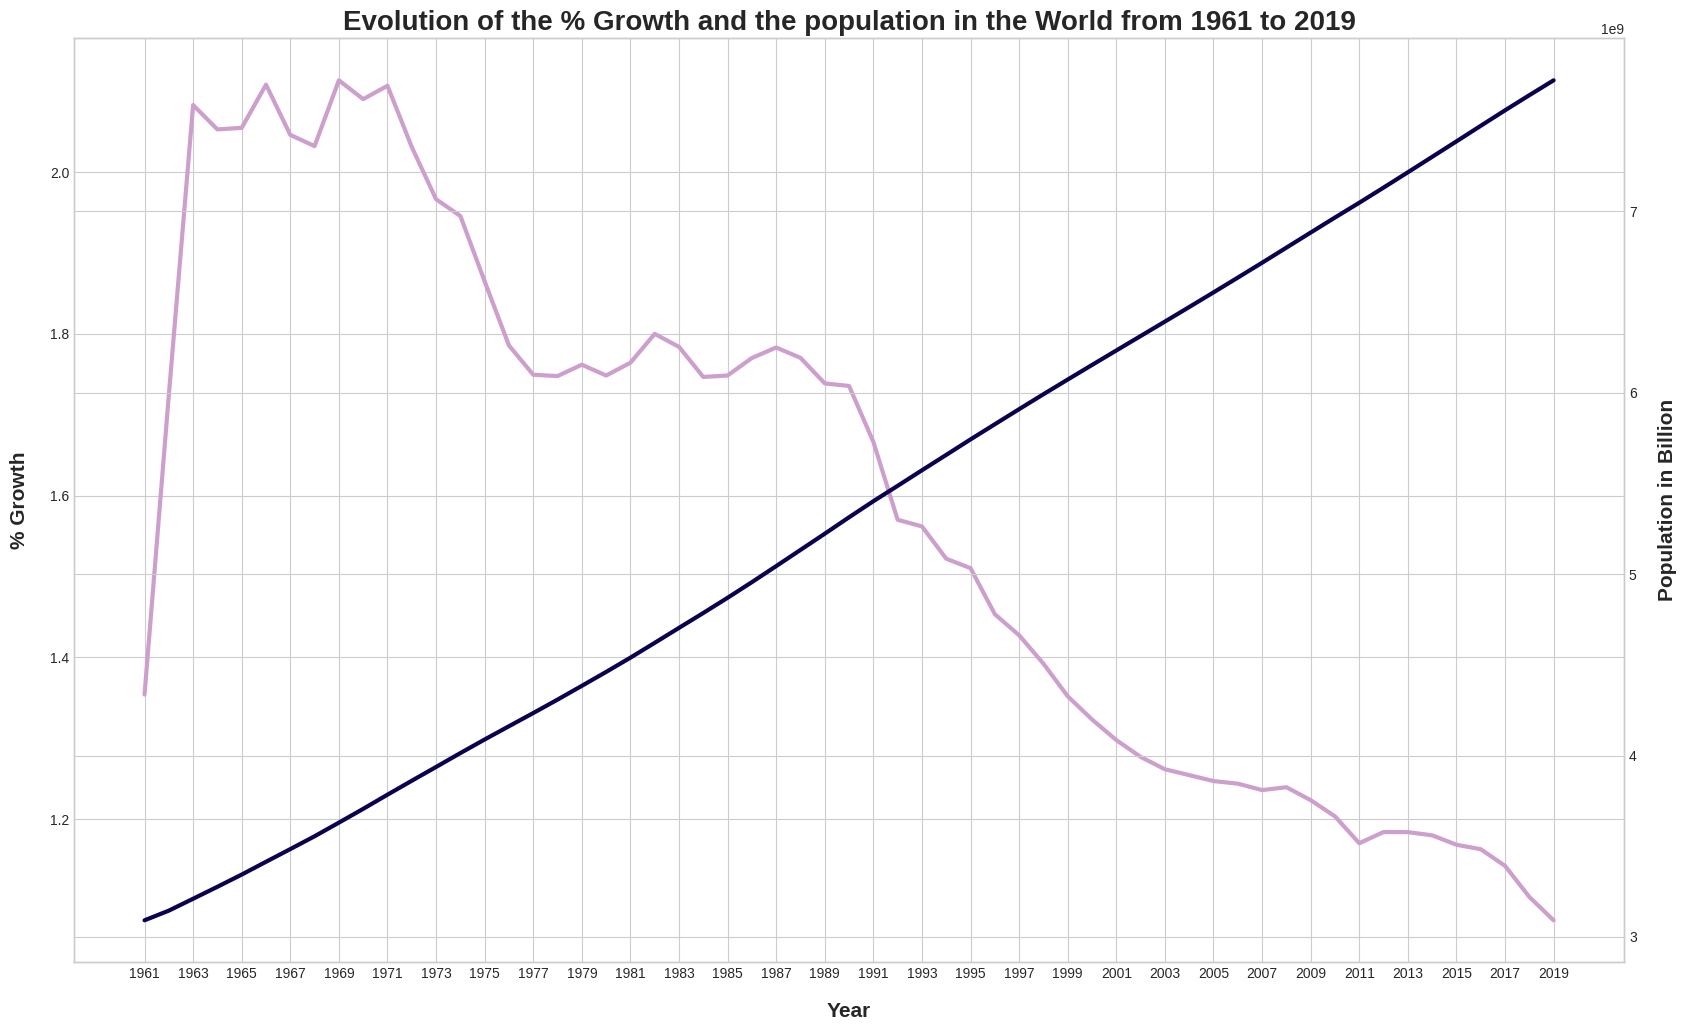

In [15]:
plt.style.use('seaborn-whitegrid')
fig, ax_G = plt.subplots(figsize=[20,12])
ax_P = ax_G.twinx()
ax_G.set_xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
ax_G.set_ylabel("% Growth",fontsize=15,fontweight=550,labelpad=15)
ax_P.set_ylabel("Population in Billion",fontsize=15,fontweight=550,labelpad=15)
ax_G.set_title("Evolution of the % Growth and the population in the World from 1961 to 2019",fontsize=20,fontweight=600)
ax_P.set_xticks([i*2 for i in range(0,30)])
ax_P.set_xticklabels(labels  = [1961 + i*2 for i in range(0,30)])

ax_G.plot([int(item) for item in World.columns[2:61].tolist()],World[World.columns[2:61]].values[0],linewidth=3,label="% Growth",color = "#CD9FCC")
ax_P.plot([int(item[-4:]) for item in World.columns[61:].tolist()],World[World.columns[61:]].values[0],linewidth=3,label="Population",color = "#0A014F")

ax_G.set_xticks([1961 + i*2 for i in range(0,30)])
ax_G.set_xticklabels([1961 + i*2 for i in range(0,30)])

In [16]:
Evolution_by_region = df.groupby(["Region"]).mean()
Percentage_years_columns = Evolution_by_region.columns[0:59] #% growth columns 
Population_years_columns = Evolution_by_region.columns[59:] #population size columns 
Evolution_by_region

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,2.615088,2.721297,2.758067,2.725930,2.609322,2.566872,2.427968,2.314403,2.403668,2.488723,...,7.018177e+07,7.065903e+07,7.114908e+07,7.164415e+07,7.214366e+07,7.264220e+07,7.315343e+07,7.366609e+07,7.412363e+07,7.453389e+07
Europe & Central Asia,1.639127,1.676346,1.649338,1.590681,1.532719,1.436181,1.396342,1.333351,1.257902,1.205030,...,1.404618e+07,1.408644e+07,1.415094e+07,1.422666e+07,1.430346e+07,1.437959e+07,1.445421e+07,1.452034e+07,1.458288e+07,1.464443e+07
Latin America & Caribbean,2.253311,2.210517,2.155360,2.102156,2.055885,2.001875,1.959895,1.930298,1.923506,1.907114,...,1.617019e+07,1.634663e+07,1.652094e+07,1.669514e+07,1.687101e+07,1.705025e+07,1.723391e+07,1.742025e+07,1.760395e+07,1.778461e+07
Middle East & North Africa,4.108606,4.419977,4.424852,4.405541,4.274520,4.107937,4.187468,4.109380,4.303763,4.572730,...,1.111190e+07,1.140679e+07,1.171439e+07,1.202609e+07,1.233096e+07,1.262077e+07,1.289154e+07,1.314466e+07,1.338262e+07,1.361078e+07
North America,2.045443,1.938489,1.887509,1.930161,1.838109,1.604705,1.616341,1.511649,1.407940,1.471562,...,1.139587e+08,1.148086e+08,1.156852e+08,1.165231e+08,1.174037e+08,1.182632e+08,1.191606e+08,1.199810e+08,1.207159e+08,1.214071e+08
South Asia,2.270356,2.296972,2.328190,2.365515,2.404615,2.439058,2.466724,2.486182,2.497952,2.503123,...,2.068002e+08,2.096744e+08,2.124860e+08,2.152770e+08,2.180504e+08,2.208133e+08,2.235737e+08,2.263248e+08,2.290622e+08,2.317798e+08
Sub-Saharan Africa,2.145534,2.156893,2.190256,2.249910,2.324253,2.409822,2.480043,2.508875,2.488287,2.439713,...,1.797090e+07,1.845100e+07,1.894285e+07,1.944726e+07,1.996337e+07,2.049049e+07,2.102833e+07,2.157673e+07,2.213505e+07,2.270282e+07


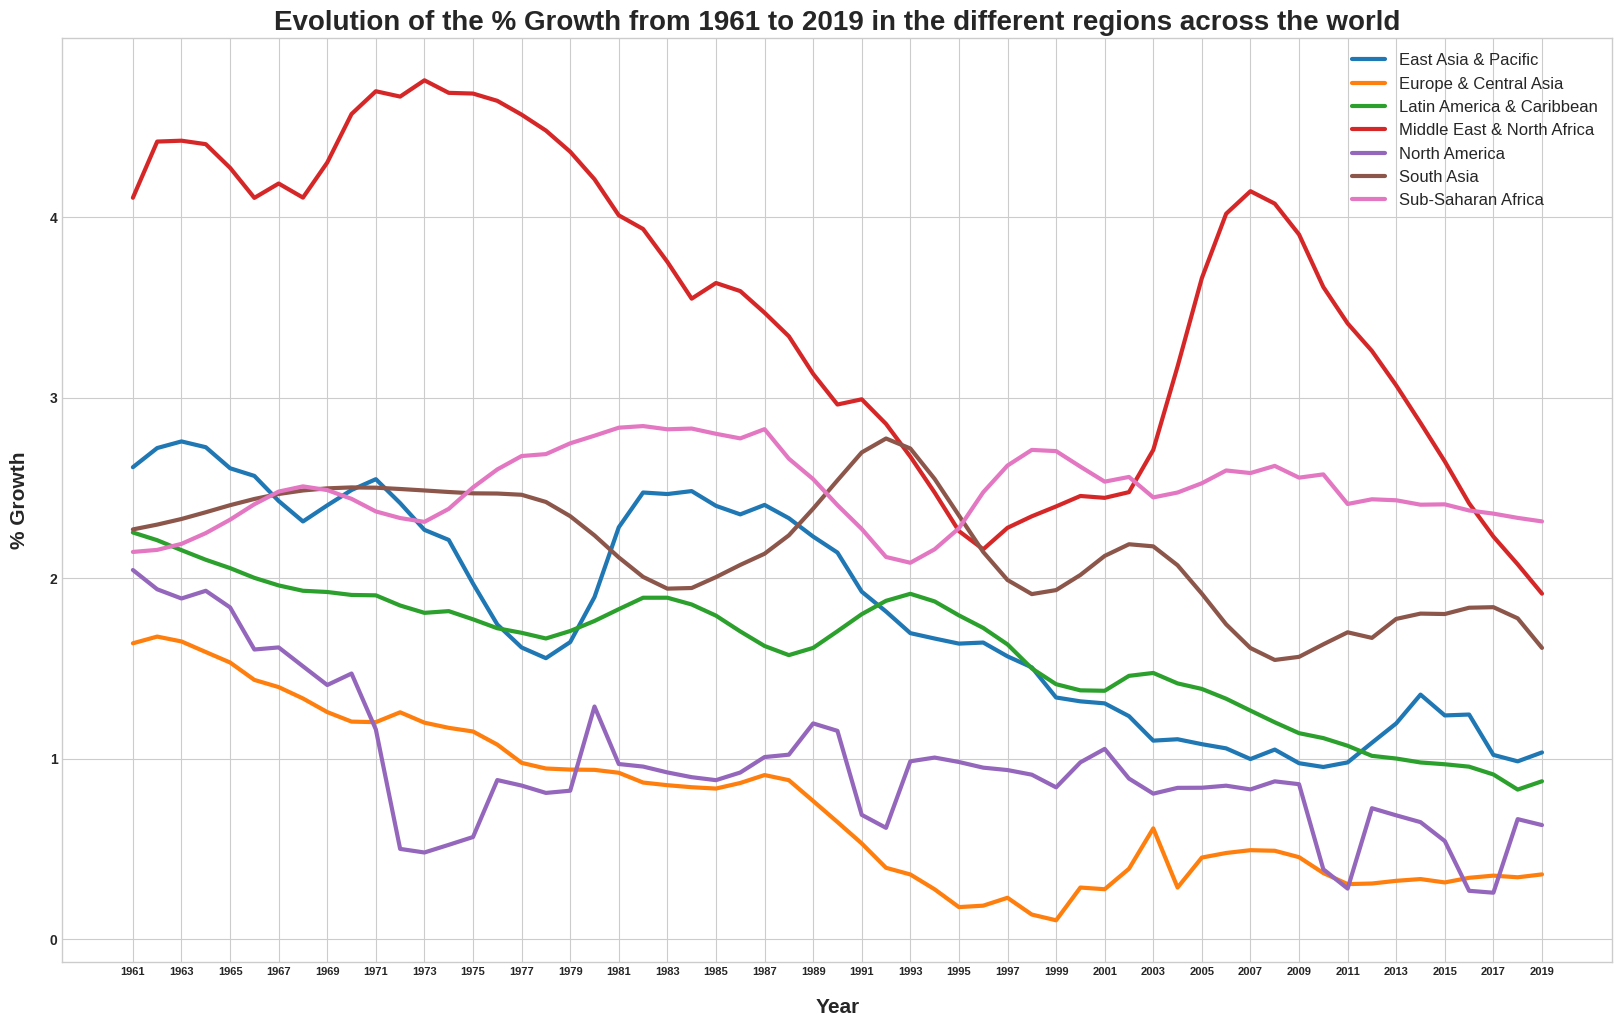

In [17]:
fig = plt.figure(figsize=[20,12])
plt.yticks(fontsize=10,fontweight=550) 
plt.xticks([i*2 for i in range(0,30)],fontsize=8,fontweight=550)
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("% Growth",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution of the % Growth from 1961 to 2019 in the different regions across the world",fontsize=20,fontweight=600)

for index in Evolution_by_region.index:
    plt.plot(Evolution_by_region[Percentage_years_columns].loc[index],label = index,linewidth=3)

plt.legend(fontsize=12)

In [18]:
print("We can see that overall, the % of growth has decreased over the last 60 years !\n")
print(f"Decrease for each region from 1961 to 2019 : \n\n\n{Evolution_by_region['1961'] - Evolution_by_region['2019']}")
Evolution_by_region[["1961","2019"]]

We can see that overall, the % of growth has decreased over the last 60 years !

Decrease for each region from 1961 to 2019 : 


Region
East Asia & Pacific           1.580760
Europe & Central Asia         1.280836
Latin America & Caribbean     1.378774
Middle East & North Africa    2.194281
North America                 1.413818
South Asia                    0.656689
Sub-Saharan Africa           -0.169169
dtype: float64


,1961,2019
Region,,
East Asia & Pacific,2.615088,1.034327
Europe & Central Asia,1.639127,0.358291
Latin America & Caribbean,2.253311,0.874537
Middle East & North Africa,4.108606,1.914325
North America,2.045443,0.631625
South Asia,2.270356,1.613668
Sub-Saharan Africa,2.145534,2.314702


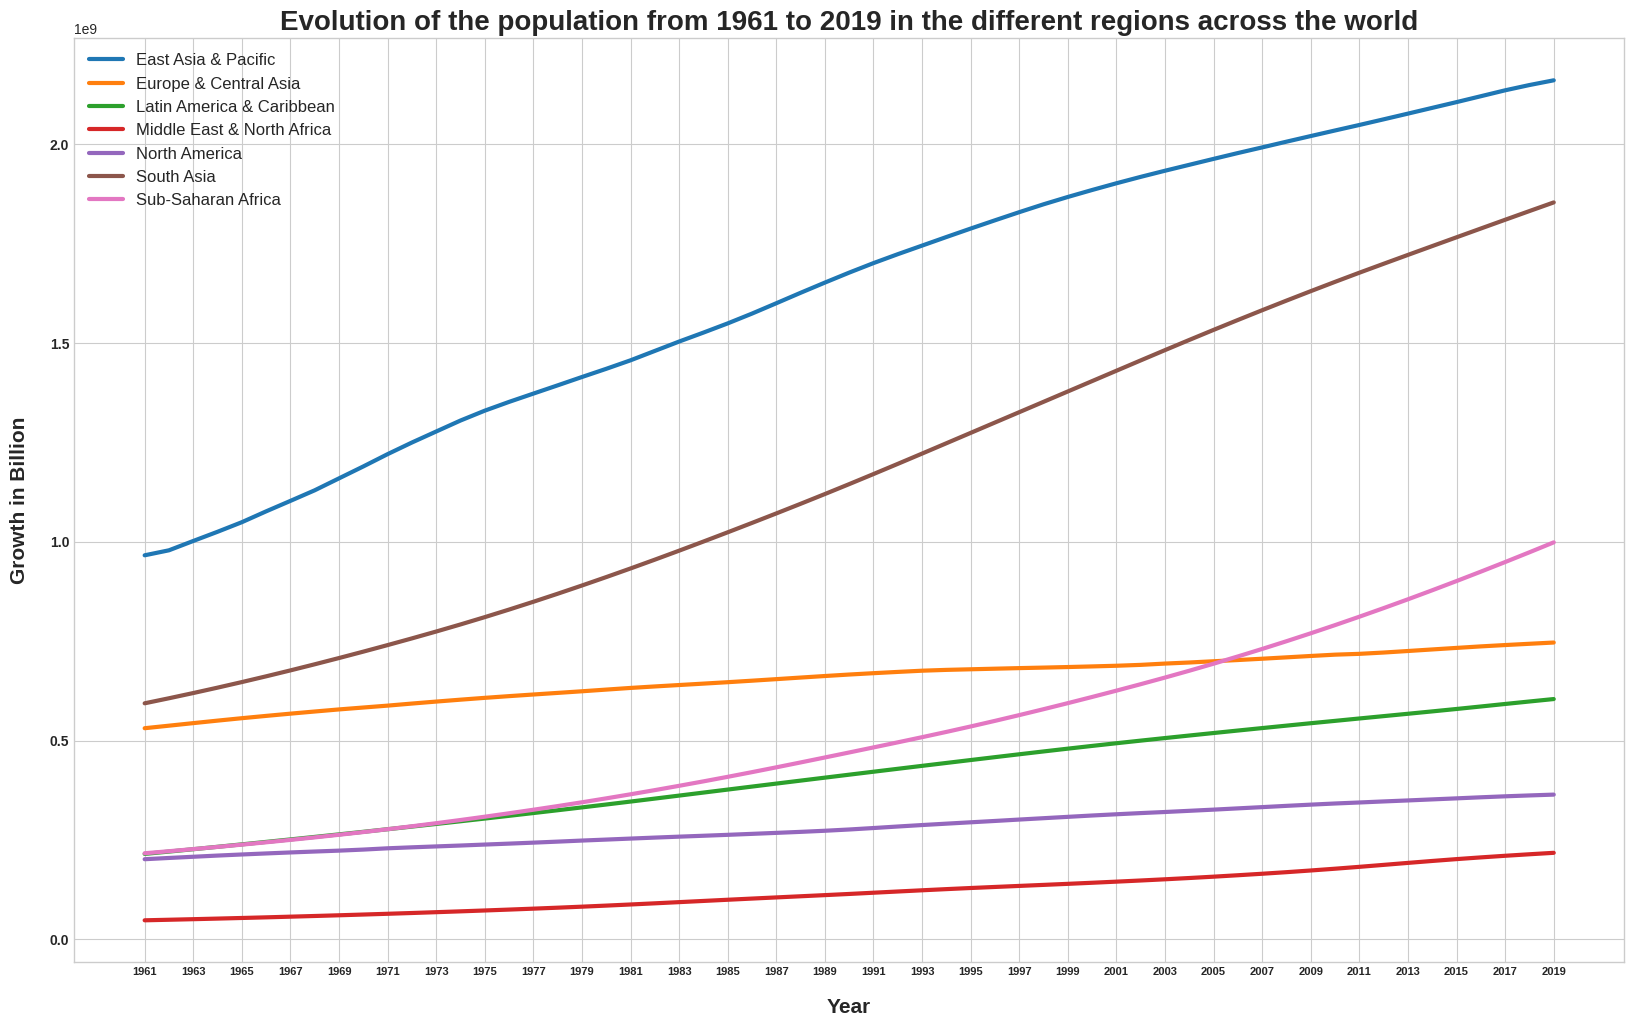

In [19]:
fig = plt.figure(figsize=[20,12])
plt.yticks(fontsize=10,fontweight=550) 
plt.xticks([i*2 for i in range(0,30)],labels=[1961+i*2 for i in range(0,30)],fontsize=8,fontweight=550)
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("Growth in Billion",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution of the population from 1961 to 2019 in the different regions across the world",fontsize=20,fontweight=600)

for index in Evolution_by_region.index:
    plt.plot(df.groupby(['Region']).sum()[Population_years_columns].loc[index],label = index,linewidth=3)

plt.legend(fontsize=12)

In [20]:
print("On the contrary, despite a decrease of % of growth, the world population has increased for each region ! \n")
print(f"Population Evolution from 1961 to 2019 : \n\n\n{df.groupby(['Region']).sum()['Population_2019'] - df.groupby(['Region']).sum()['Population_1961']}")
df.groupby(["Region"]).sum()[["Population_1961","Population_2019"]]

On the contrary, despite a decrease of % of growth, the world population has increased for each region ! 

Population Evolution from 1961 to 2019 : 


Region
East Asia & Pacific           1.195135e+09
Europe & Central Asia         2.155857e+08
Latin America & Caribbean     3.896233e+08
Middle East & North Africa    1.698075e+08
North America                 1.625491e+08
South Asia                    1.260283e+09
Sub-Saharan Africa            7.822757e+08
dtype: float64


,Population_1961,Population_2019
Region,,
East Asia & Pacific,966347771,2.161483e+09
Europe & Central Asia,531280112,7.468658e+08
Latin America & Caribbean,215053386,6.046767e+08
Middle East & North Africa,47965036,2.177725e+08
North America,201672125,3.642212e+08
South Asia,593955746,1.854239e+09
Sub-Saharan Africa,216648225,9.989239e+08


In [21]:
result = sum(df.groupby(["Region"]).sum()["Population_2019"].iloc[[0,5]])
print(f"If we add 'East Asia & Pacific' and 'South Asia', we can observe that a lot of people lives in these region :\n{result}")
print("Soit 4 billions peoples, more than half of the total earth population")

If we add 'East Asia & Pacific' and 'South Asia', we can observe that a lot of people lives in these region :
4015721464.0
Soit 4 billions peoples, more than half of the total earth population


In [22]:
EastAsia = df[df["Region"] == 'East Asia & Pacific'].copy()
SouthAsia = df[df["Region"] == 'South Asia'].copy()
print(SouthAsia[SouthAsia["Population_2019"] == SouthAsia["Population_2019"].max()]["Country Name"])
print(EastAsia[EastAsia["Population_2019"] == EastAsia["Population_2019"].max()]["Country Name"])

79    India
Name: Country Name, dtype: object
33    China
Name: Country Name, dtype: object


INDIA vs CHAINA

In [23]:
China = df[df["Country Name"] == "China"]
India = df[df["Country Name"] == "India"]

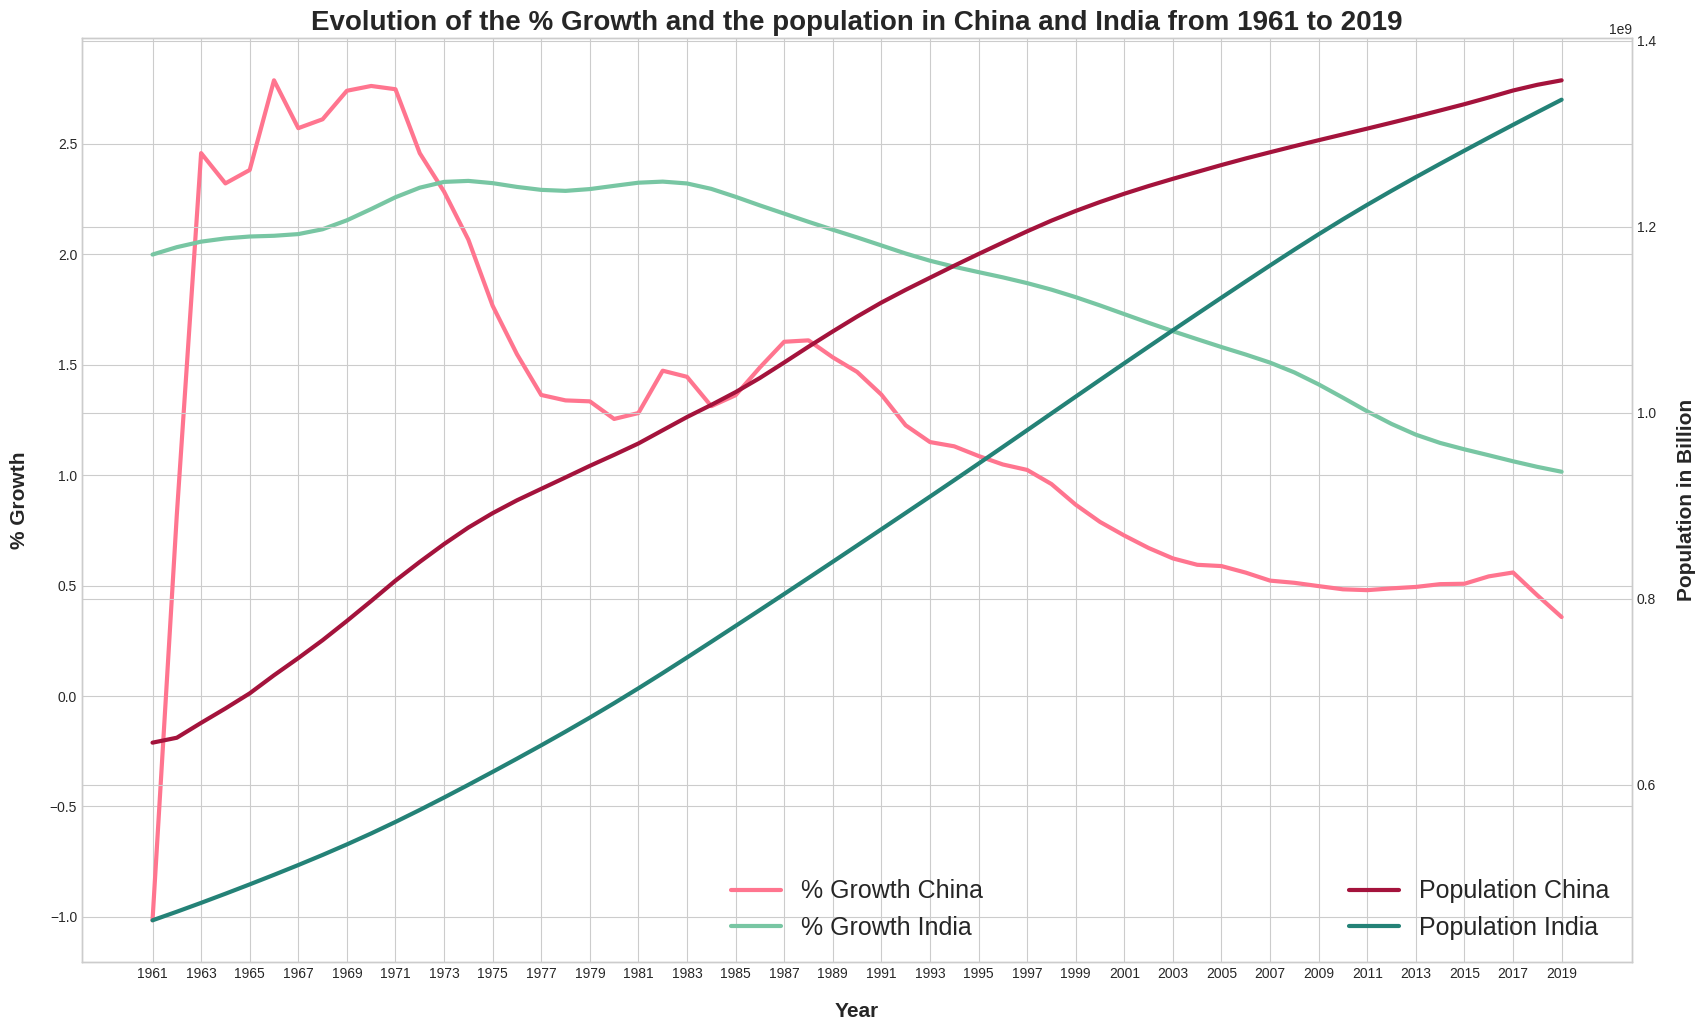

<Figure size 640x480 with 0 Axes>

In [24]:
fig, ax_G = plt.subplots(figsize=[20,12])
ax_P = ax_G.twinx()
fig = plt.figure()
ax_G.set_xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
ax_G.set_ylabel("% Growth",fontsize=15,fontweight=550,labelpad=15)
ax_P.set_ylabel("Population in Billion",fontsize=15,fontweight=550,labelpad=15)
ax_G.set_title("Evolution of the % Growth and the population in China and India from 1961 to 2019",fontsize=20,fontweight=600)
ax_P.set_xticks([i*2 for i in range(0,30)])
ax_P.set_xticklabels(labels  = [1961 + i*2 for i in range(0,30)])

ax_G.plot([int(item) for item in China.columns[4:63].tolist()],China[China.columns[4:63]].values[0],linewidth=3,label="% Growth China",color = "#ff758f")
ax_P.plot([int(item[-4:]) for item in China.columns[63:].tolist()],China[China.columns[63:]].values[0],linewidth=3,label="Population China",color = "#a4133c")
ax_G.plot([int(item) for item in India.columns[4:63].tolist()],India[India.columns[4:63]].values[0],linewidth=3,label="% Growth India",color = "#78c6a3")
ax_P.plot([int(item[-4:]) for item in India.columns[63:].tolist()],India[India.columns[63:]].values[0],linewidth=3,label="Population India",color = "#248277")

ax_G.set_xticks([1961 + i*2 for i in range(0,30)])
ax_G.set_xticklabels([1961 + i*2 for i in range(0,30)])
ax_G.legend(fontsize=18,loc=8)
ax_P.legend(fontsize=18,loc=4)

In [25]:
Growth_AVG = df[df.columns[4:63]].mean()
Pop_AVG = df[df.columns[63:]].mean()

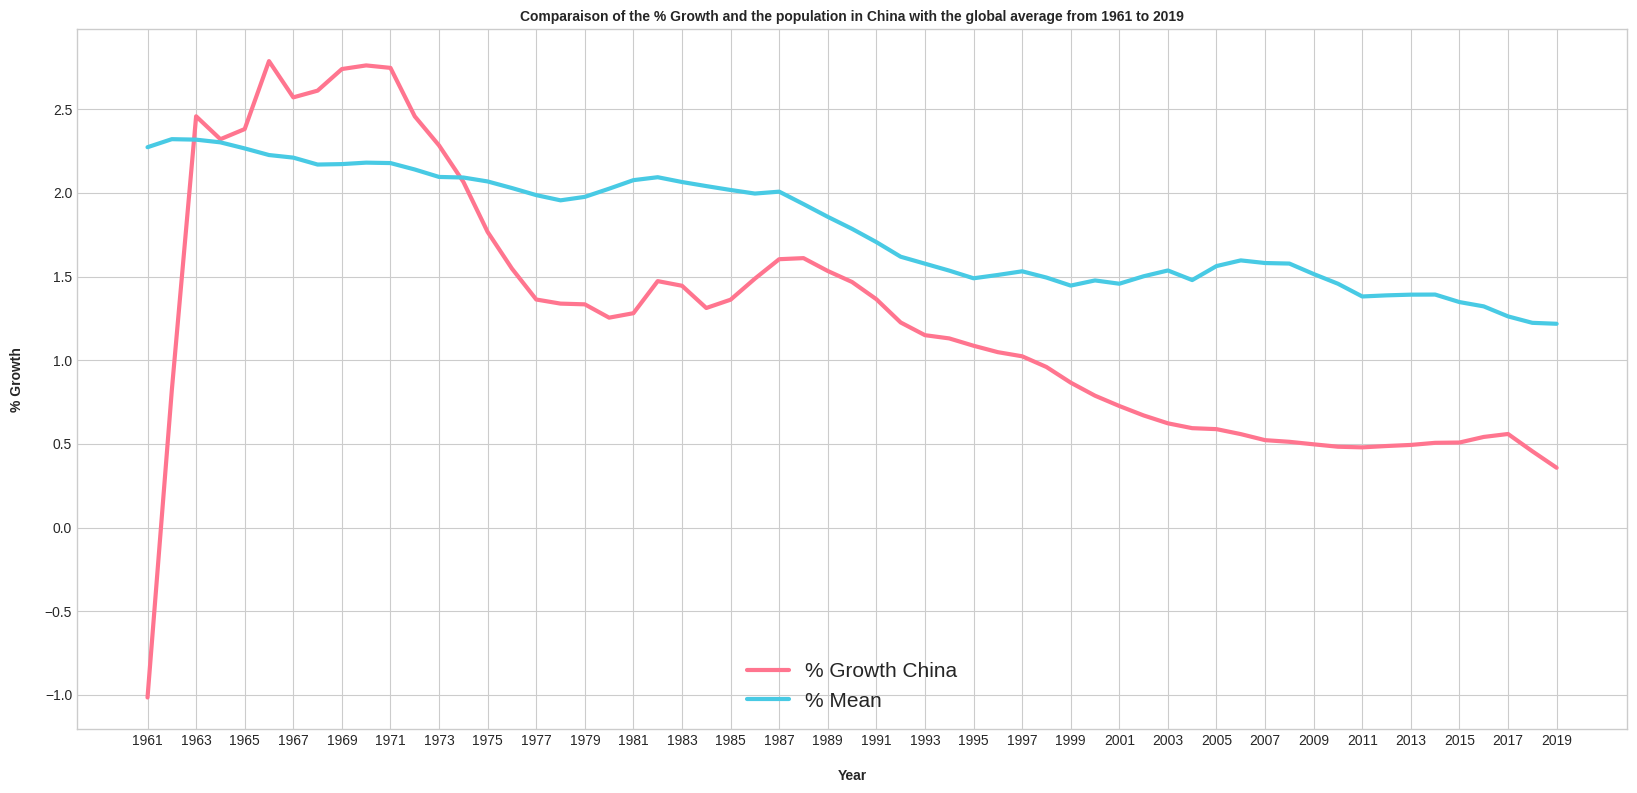

<Figure size 640x480 with 0 Axes>

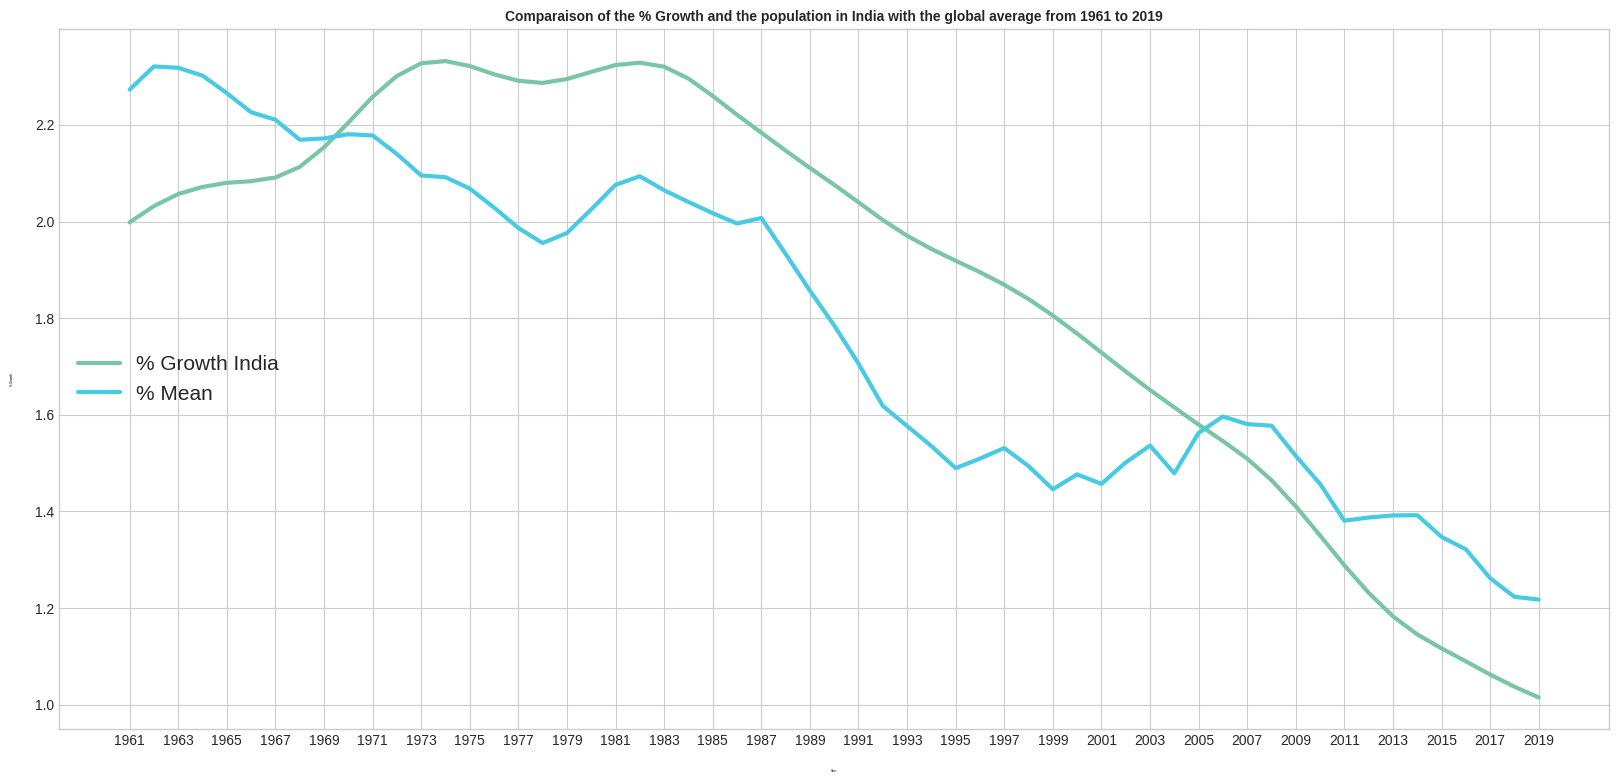

In [26]:
plt.figure(figsize=[20,20])
ax_G = plt.subplot(211)

fig = plt.figure()
ax_G.set_xlabel("Year",fontsize=10,fontweight=550,labelpad=15)
ax_G.set_ylabel("% Growth",fontsize=10,fontweight=550,labelpad=15)
ax_G.set_title("Comparaison of the % Growth and the population in China with the global average from 1961 to 2019",fontsize=10,fontweight=600)
ax_G.set_xticks([i*2 for i in range(0,30)])
ax_G.set_xticklabels(labels  = [1961 + i*2 for i in range(0,30)])

ax_G.plot([int(item) for item in China.columns[4:63].tolist()],China[China.columns[4:63]].values[0],linewidth=3,label="% Growth China",color = "#ff758f")

ax_G.plot([int(item) for item in China.columns[4:63].tolist()],df[df.columns[4:63]].mean(),linewidth=3,label="% Mean",color = "#48cae4")


ax_G.set_xticks([1961 + i*2 for i in range(0,30)])
ax_G.set_xticklabels([1961 + i*2 for i in range(0,30)])
ax_G.legend(fontsize=15,loc=8)

#Set a figure 
plt.figure(figsize=[20,20])
ax_G2 = plt.subplot(212)

ax_G2.set_xlabel("Year",fontsize=2,fontweight=550,labelpad=15)
ax_G2.set_ylabel("% Growth",fontsize=2,fontweight=550,labelpad=15)
ax_G2.set_title("Comparaison of the % Growth and the population in India with the global average from 1961 to 2019",fontsize=10,fontweight=600)
ax_G2.set_xticks([i*2 for i in range(0,30)])
ax_G2.set_xticklabels(labels  = [1961 + i*2 for i in range(0,30)])

ax_G2.plot([int(item) for item in India.columns[4:63].tolist()],India[India.columns[4:63]].values[0],linewidth=3,label="% Growth India",color = "#78c6a3")

ax_G2.plot([int(item) for item in China.columns[4:63].tolist()],df[df.columns[4:63]].mean(),linewidth=3,label="% Mean",color = "#48cae4")

ax_G2.set_xticks([1961 + i*2 for i in range(0,30)])
ax_G2.set_xticklabels([1961 + i*2 for i in range(0,30)])
ax_G2.legend(fontsize=15,loc=6)

Forecasting world % growth for next years

In [27]:
PercentGrowth = pd.melt(World[World.columns[2:61]]).rename(columns={"variable" : "Year","value" : "PercGrowth"})
PercentGrowth["Year"] = PercentGrowth["Year"].map(lambda x : pd.to_datetime(f"{x}-12-31"))
PercentGrowth.head(5)

,Year,PercGrowth
0,1961-12-31,1.353920
1,1962-12-31,1.724198
2,1963-12-31,2.083131
3,1964-12-31,2.052951
4,1965-12-31,2.054892


Regression

<Axes: title={'center': '% Growth of the world population'}, xlabel='Year', ylabel='% Growth'>

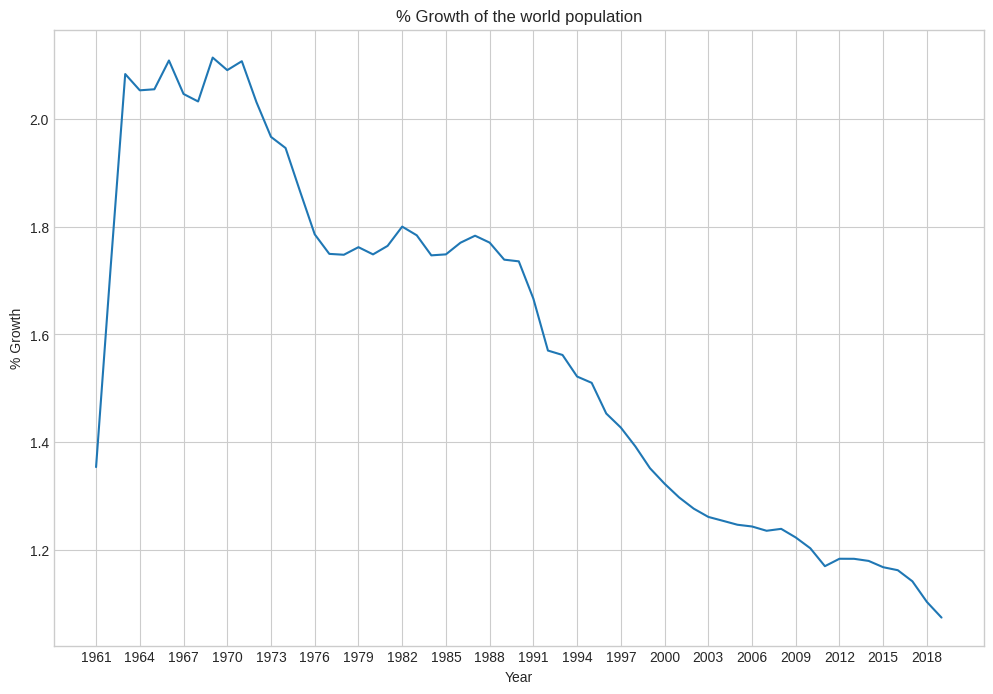

In [28]:
plt.figure(figsize=[12,8])
plt.title("% Growth of the world population")
plt.xlabel("Year")
plt.ylabel("% Growth")
plt.xticks([i*3 for i in range(0,20)],labels = [1961 + i*3 for i in range(20)])
PercentGrowth['PercGrowth'].plot()

P-value:  0.9437518182894579 , then no stationarity.


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

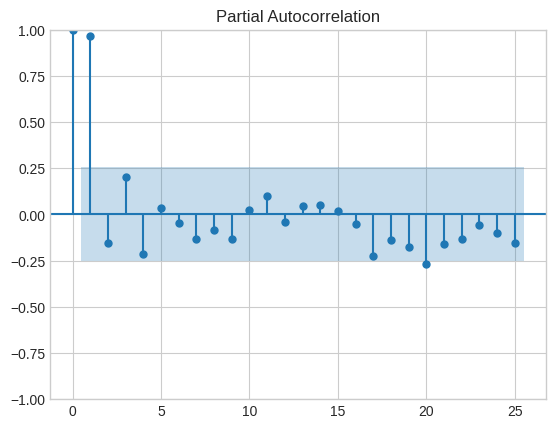

In [29]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
PG_stationarityTest = adfuller(PercentGrowth['PercGrowth'], autolag='AIC')
print("P-value: ", PG_stationarityTest[1],", then no stationarity.")
plt.figure(figsize=[12,8])
pacf = plot_pacf(PercentGrowth['PercGrowth'], lags=25)
train_data = PercentGrowth['PercGrowth'][:round(len(PercentGrowth['PercGrowth'])*0.8)]
test_data = PercentGrowth['PercGrowth'][round(len(PercentGrowth['PercGrowth'])*0.8):]

In [30]:
ar_model = AutoReg(train_data, lags=6).fit()
print(ar_model.summary())
plt.show()

                            AutoReg Model Results                             
Dep. Variable:             PercGrowth   No. Observations:                   47
Model:                     AutoReg(6)   Log Likelihood                  83.798
Method:               Conditional MLE   S.D. of innovations              0.031
Date:                Thu, 30 Mar 2023   AIC                           -151.596
Time:                        14:56:36   BIC                           -137.887
Sample:                             6   HQIC                          -146.604
                                   47                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0029      0.037      0.079      0.937      -0.070       0.076
PercGrowth.L1     1.2875      0.155      8.303      0.000       0.984       1.591
PercGrowth.L2    -0.3271      0.246     

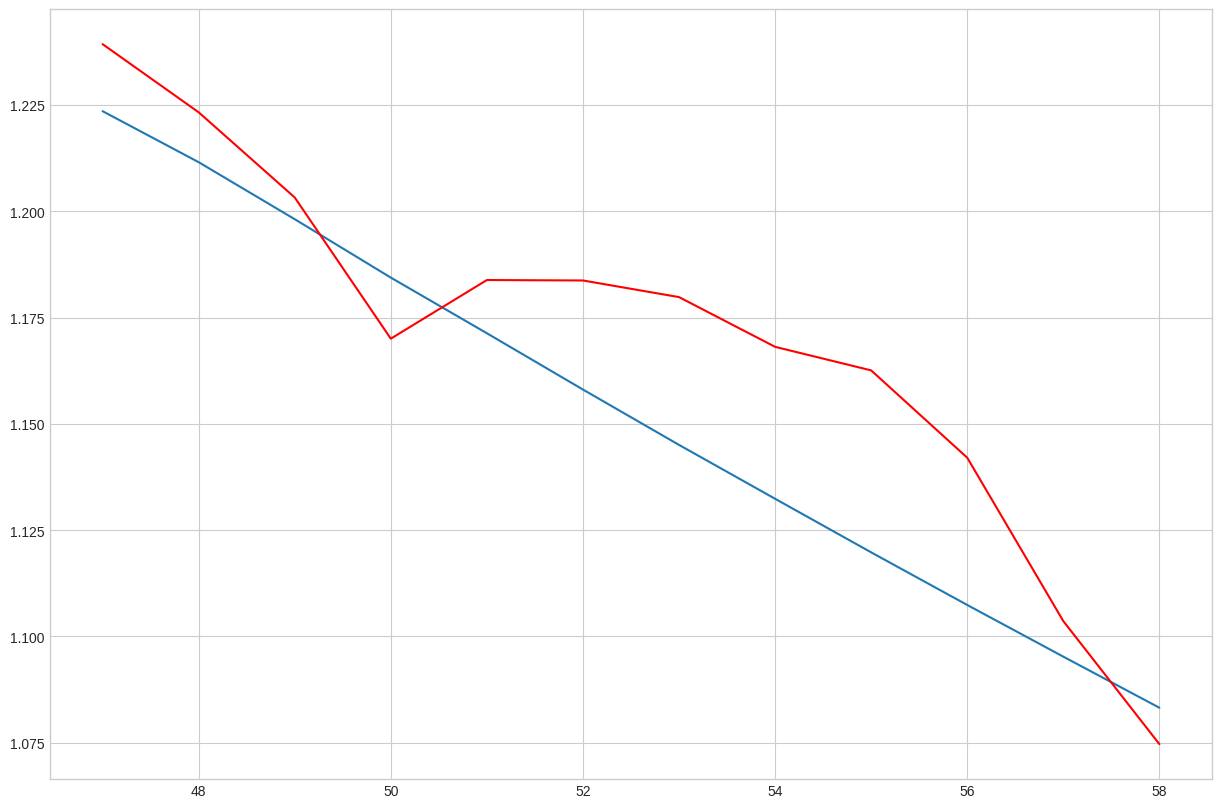

In [31]:
plt.figure(figsize=[15,10])
pred = ar_model.predict(start=len(train_data), end=(len(PercentGrowth)-1), dynamic=False)
# Plot the prediction vs test data
plt.plot(pred)
plt.plot(test_data, color='red')

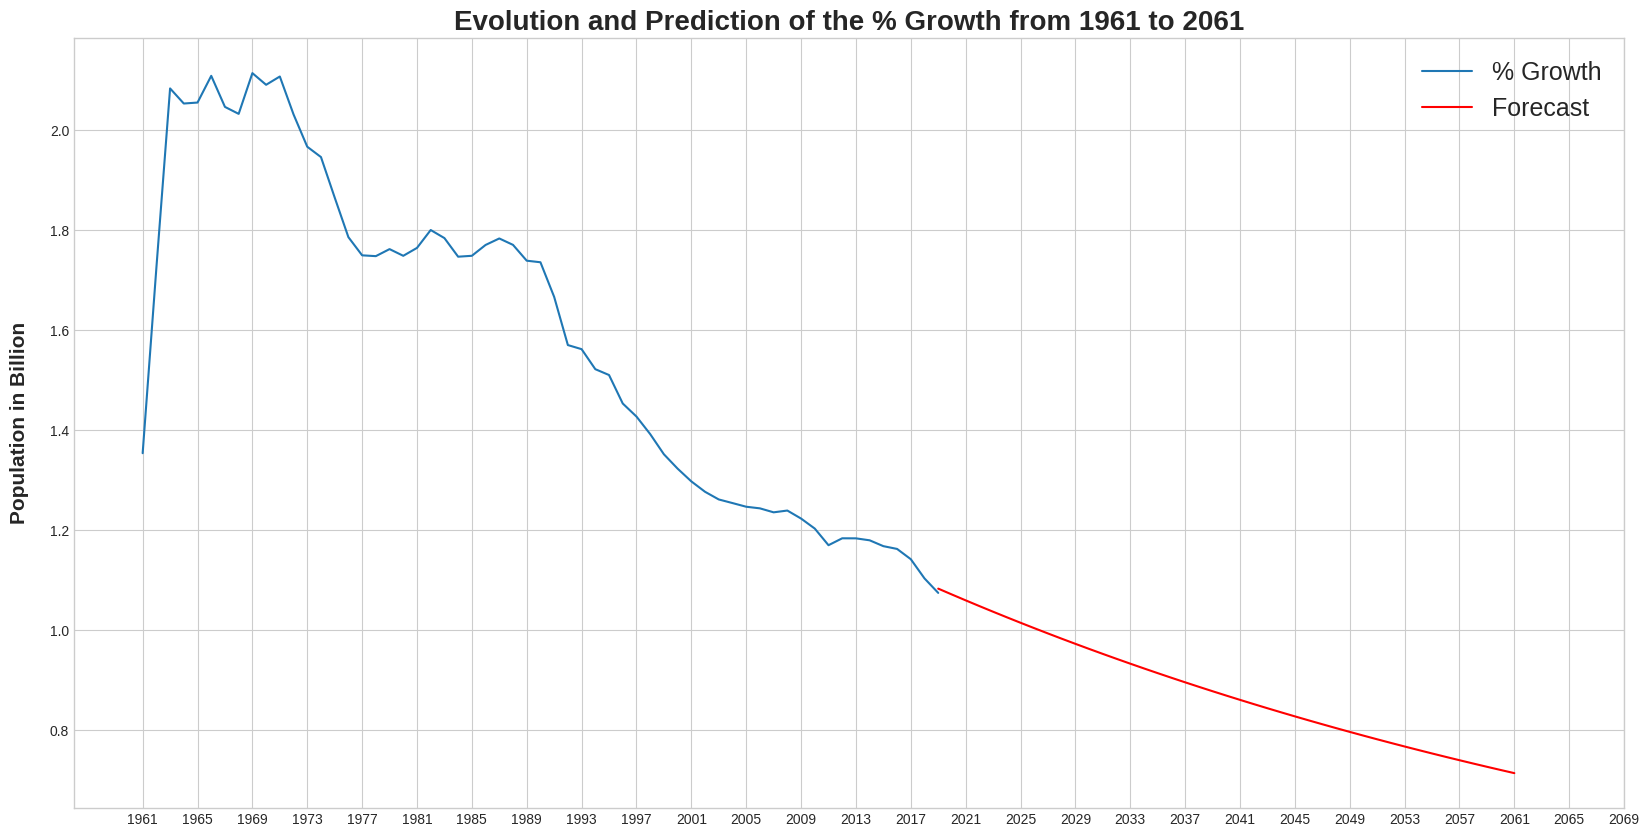

In [32]:
plt.figure(figsize=[20,10])
plt.plot(PercentGrowth['PercGrowth'],label="% Growth")
pred = ar_model.predict(start=len(PercentGrowth)-1, end=(len(PercentGrowth)+41), dynamic=False)
plt.plot(pred,color='red',label="Forecast")
plt.xticks([i*4 for i in range(28)],labels = [1961 + i*4 for i in range(28)])
plt.ylabel("Population in Billion",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution and Prediction of the % Growth from 1961 to 2061",fontsize=20,fontweight=600)
plt.legend(fontsize=18)

In [33]:
PopIni = World["Population_2019"].values[0]
Pred_pop_size = []

for percGrowth in pred:
    PopIni = PopIni + PopIni * (percGrowth/100)
    Pred_pop_size.append(PopIni)

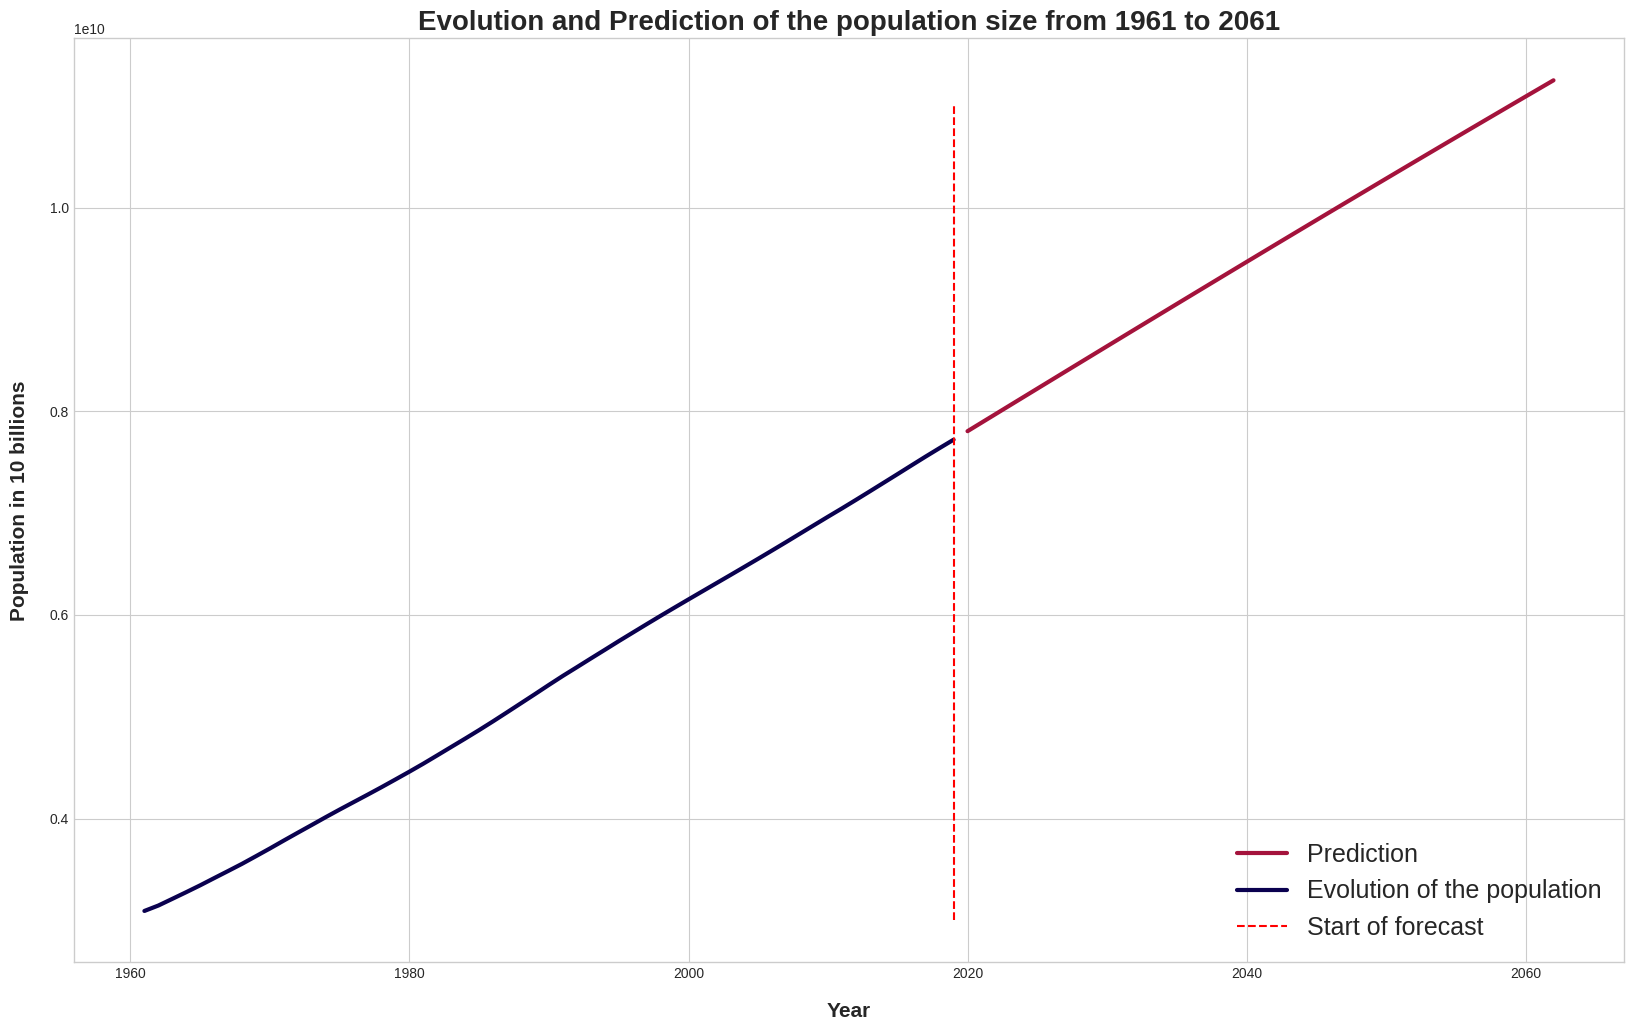

In [34]:
fig = plt.figure(figsize=[20,12])
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("Population in 10 billions",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution and Prediction of the population size from 1961 to 2061",fontsize=20,fontweight=600)

plt.plot([2020 + i for i in range(43)],Pred_pop_size,linewidth=3,label="Prediction",color = "#a4133c")
plt.plot([int(item[-4:]) for item in World.columns[61:].tolist()],World[World.columns[61:]].values[0],linewidth=3,label="Evolution of the population",color = "#0A014F")
plt.vlines(2019, 3000000000, 11000000000, linestyle='--', color='r', label='Start of forecast');
plt.legend(fontsize=18,loc=4)

Exponential smoothing

In [35]:
PercentGrowth = PercentGrowth.set_index("Year")
PercentGrowth.head(5)

,PercGrowth
Year,
1961-12-31,1.353920
1962-12-31,1.724198
1963-12-31,2.083131
1964-12-31,2.052951
1965-12-31,2.054892


In [36]:
from statsmodels.tsa.holtwinters import Holt
df = PercentGrowth.copy()
train = df.iloc[:58, :]
test = df.iloc[58:, :]
train.index = pd.to_datetime(train.index,format="%Y")
test.index = pd.to_datetime(test.index,format="%Y")
pred = test.copy()


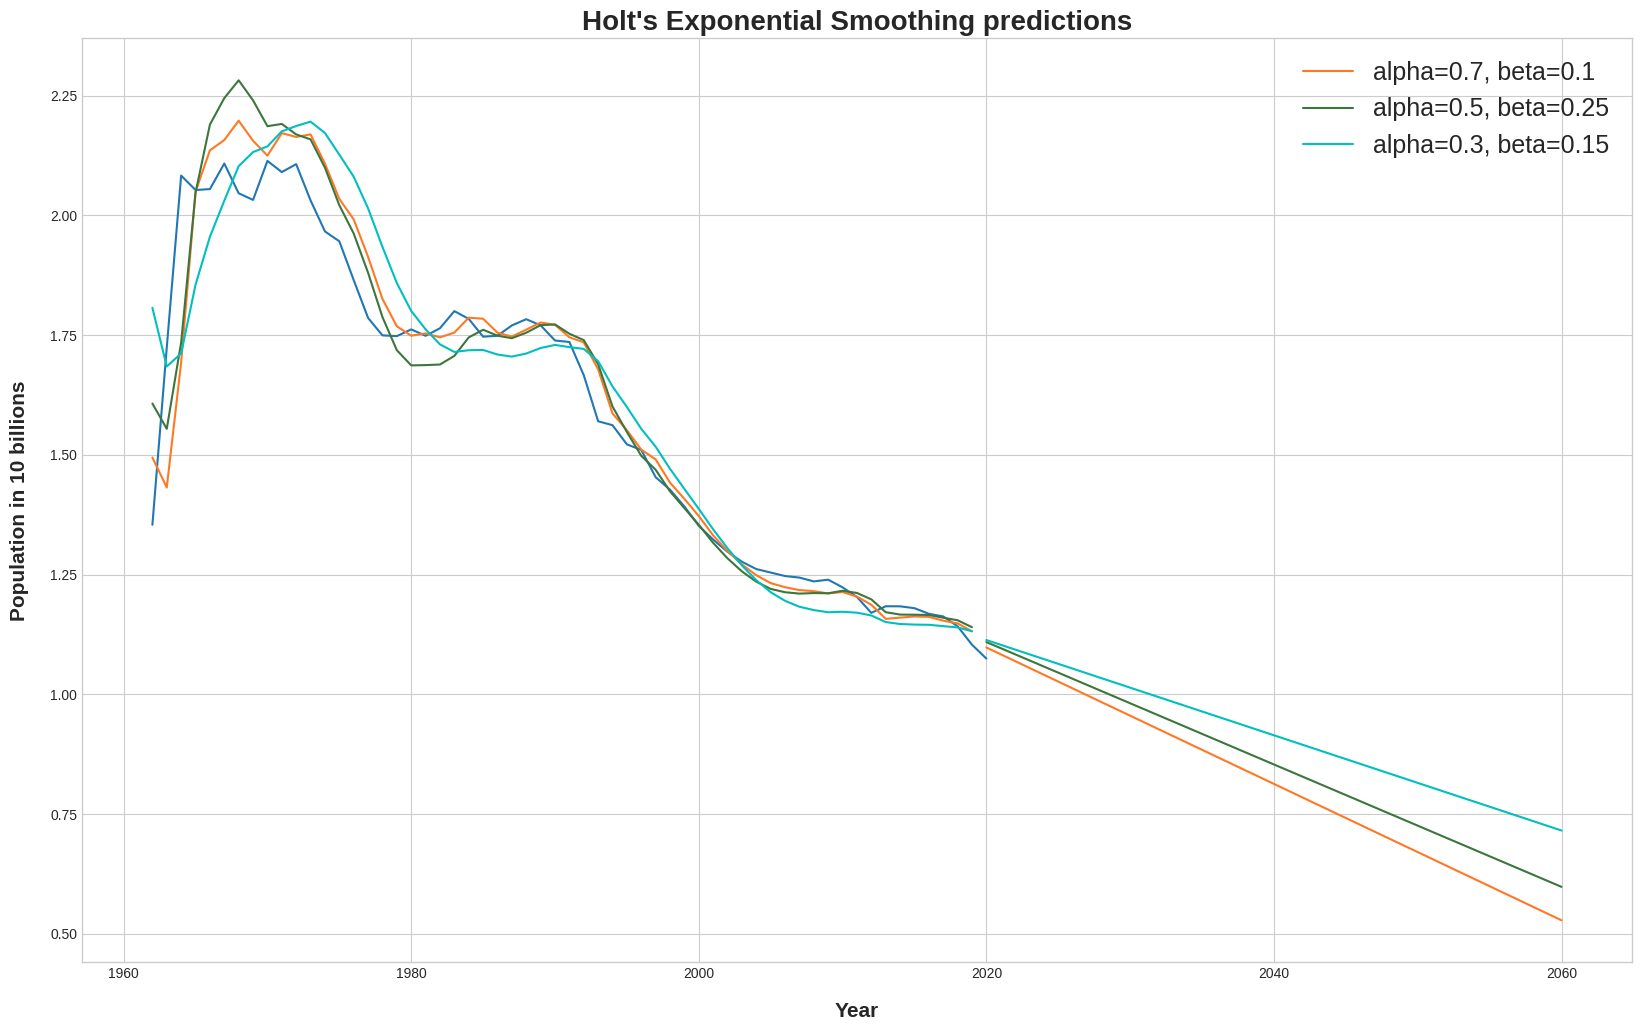

In [37]:
model = Holt(np.asarray(train['PercGrowth']))
fit1 = model.fit(smoothing_level=.7, smoothing_trend=.1)
pred1 = fit1.forecast(len(test)+40)
fit2 = model.fit(smoothing_level=.5, smoothing_trend=.25)
pred2 = fit2.forecast(len(test)+40)
fit3 = model.fit(smoothing_level=.3, smoothing_trend=.15)
pred3 = fit3.forecast(len(test)+40)
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(df.index, df.values)
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot([pd.to_datetime(f'{year}-12-31T00:00:00.000000000') for year in range(2019,2060)], p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_trend'])[:4], color=c)
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("Population in 10 billions",fontsize=15,fontweight=550,labelpad=15)
plt.title("Holt's Exponential Smoothing predictions",fontsize=20,fontweight=600)
plt.legend(fontsize=18)

In [38]:
PopIni = World["Population_2019"].values[0]
#orange one 
Pred_pop_size1 = []
for percGrowth in pred1:
    PopIni = PopIni + PopIni * (percGrowth/100)
    Pred_pop_size1.append(PopIni)

#green one
PopIni = World["Population_2019"].values[0]
Pred_pop_size2 = []
for percGrowth in pred2:
    PopIni = PopIni + PopIni * (percGrowth/100)
    Pred_pop_size2.append(PopIni)
    
#blue one
PopIni = World["Population_2019"].values[0]
Pred_pop_size3 = []
for percGrowth in pred3: 
    PopIni = PopIni + PopIni * (percGrowth/100)
    Pred_pop_size3.append(PopIni)

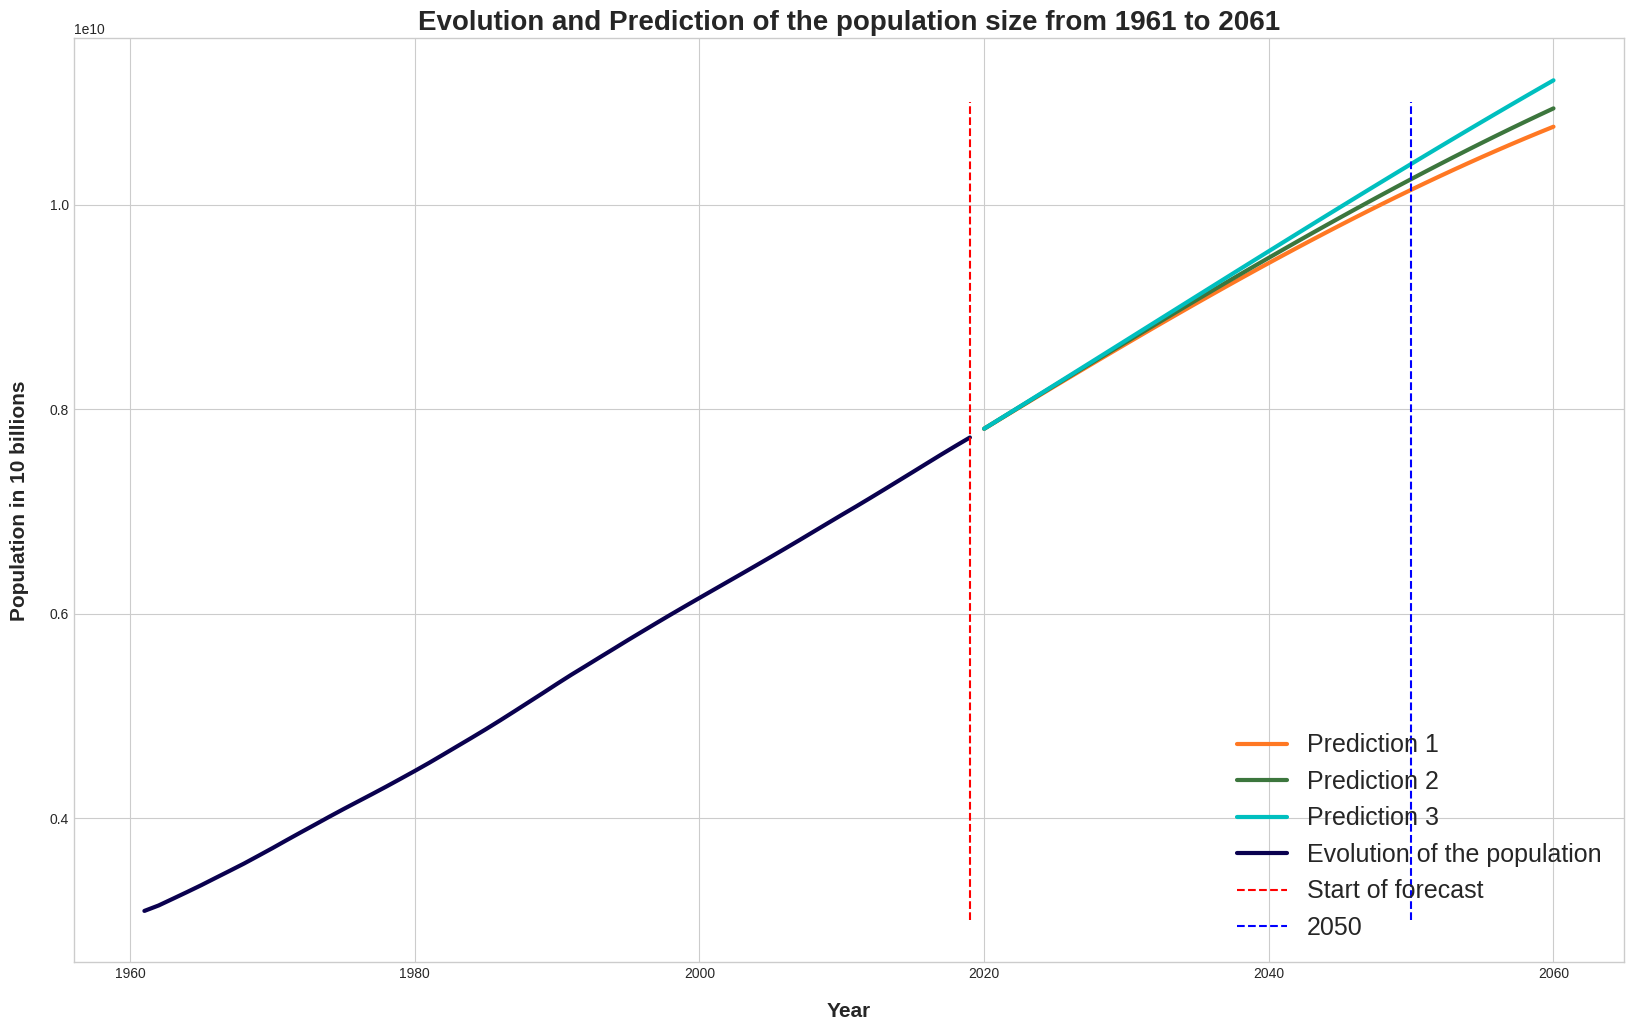

In [39]:
fig = plt.figure(figsize=[20,12])
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("Population in 10 billions",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution and Prediction of the population size from 1961 to 2061",fontsize=20,fontweight=600)

plt.plot([2020 + i for i in range(41)],Pred_pop_size1,linewidth=3,label="Prediction 1",color = "#ff7823")
plt.plot([2020 + i for i in range(41)],Pred_pop_size2,linewidth=3,label="Prediction 2",color = "#3c763d")
plt.plot([2020 + i for i in range(41)],Pred_pop_size3,linewidth=3,label="Prediction 3 ",color = "c")
plt.plot([int(item[-4:]) for item in World.columns[61:].tolist()],World[World.columns[61:]].values[0],linewidth=3,label="Evolution of the population",color = "#0A014F")
plt.vlines(2019, 3000000000, 11000000000, linestyle='--', color='r', label='Start of forecast');

plt.vlines(2050, 3000000000, 11000000000, linestyle='--', color='b', label='2050');
plt.legend(fontsize=18,loc=4)